# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import os

# Visualisation
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("seaborn-colorblind")

import pandas_datareader.data as web
from pandas_datareader import data as web
from pandas import Series, DataFrame
import datetime
from operator import itemgetter # constructs a callable that assumes an iterable object (e.g. list, tuple, set) as input, and fetches the n-th element out of it.
from datetime import datetime
from datetime import datetime, timedelta

import statsmodels.api as sm

In [4]:
gbpusd = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2000, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

gbpusd['Currency'] = 'GBP'
gbpusd

,High,Low,Open,Close,Volume,Adj Close,Currency
Date,,,,,,,
2003-12-01,1.727205,1.718390,1.723811,1.718597,0.0,1.718597,GBP
2003-12-02,1.732112,1.717298,1.719010,1.730313,0.0,1.730313,GBP
2003-12-03,1.731812,1.725209,1.730493,1.728101,0.0,1.728101,GBP
2003-12-04,1.728997,1.718302,1.727414,1.720697,0.0,1.720697,GBP
2003-12-05,1.733102,1.719809,1.720608,1.733102,0.0,1.733102,GBP
...,...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224,GBP
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819,GBP
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604,GBP


In [5]:
eurgbp = web.DataReader("EURGBP=X", "yahoo", start=datetime(2000, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

eurgbp['Currency'] = 'EUR'
eurgbp

,High,Low,Open,Close,Volume,Adj Close,Currency
Date,,,,,,,
2000-01-03,0.62900,0.62030,0.62390,0.62540,0.0,0.62540,EUR
2000-01-04,0.63140,0.62360,0.62530,0.62830,0.0,0.62830,EUR
2000-01-05,0.63300,0.62680,0.62810,0.62840,0.0,0.62840,EUR
2000-01-06,0.63160,0.62420,0.62960,0.62590,0.0,0.62590,EUR
2000-01-07,0.62940,0.62350,0.62650,0.62840,0.0,0.62840,EUR
...,...,...,...,...,...,...,...
2022-10-25,0.86993,0.86460,0.86920,0.86920,0.0,0.86920,EUR
2022-10-26,0.86875,0.86186,0.86708,0.86708,0.0,0.86708,EUR
2022-10-27,0.86494,0.85750,0.86177,0.86177,0.0,0.86177,EUR


In [6]:
gbp15 = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2015, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

gbp15

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,1.558094,1.558094,1.558094,1.558094,0.0,1.558094
2015-01-02,1.558458,1.538746,1.558021,1.557972,0.0,1.557972
2015-01-05,1.532004,1.520612,1.528608,1.528491,0.0,1.528491
2015-01-06,1.527370,1.515795,1.525832,1.525832,0.0,1.525832
2015-01-07,1.515611,1.506796,1.513638,1.513798,0.0,1.513798
...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604


# ARIMA Model  - GBP/USD 2004 - 2022

Autoregressive Integrated Moving Average (ARIMA): ARIMA, is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

In [7]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

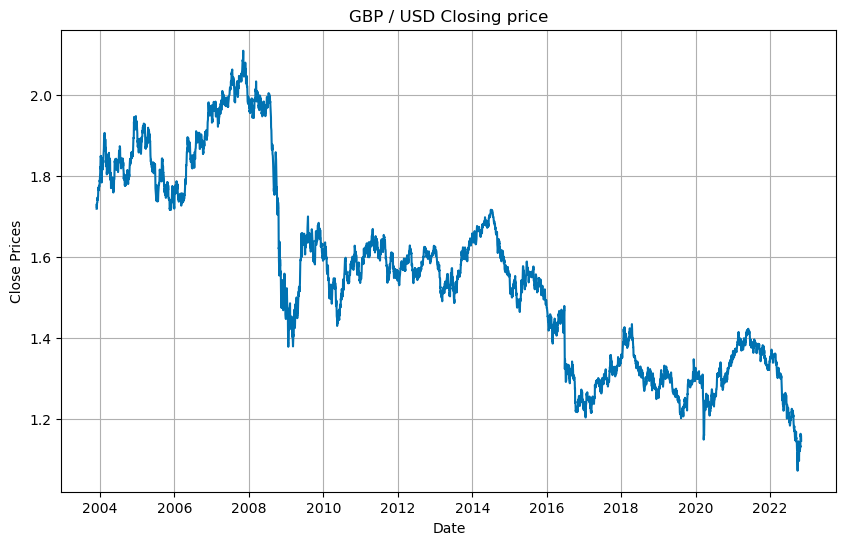

In [9]:
# Visualize the daily closing price.
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(gbpusd['Close'])
plt.title('GBP / USD Closing price')
plt.show()

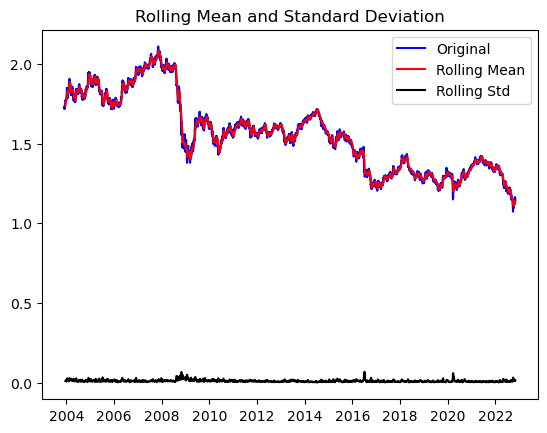

Results of dickey fuller test
Test Statistics                  -0.909722
p-value                           0.784754
No. of lags used                  0.000000
Number of observations used    4919.000000
critical value (1%)              -3.431680
critical value (5%)              -2.862128
critical value (10%)             -2.567083
dtype: float64


In [12]:
# checking for stationary trend
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Plotting rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test") #  tests the null hypothesis that a unit root is present in an autoregressive time series model
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(gbpusd['Close'])

<Figure size 640x480 with 0 Axes>

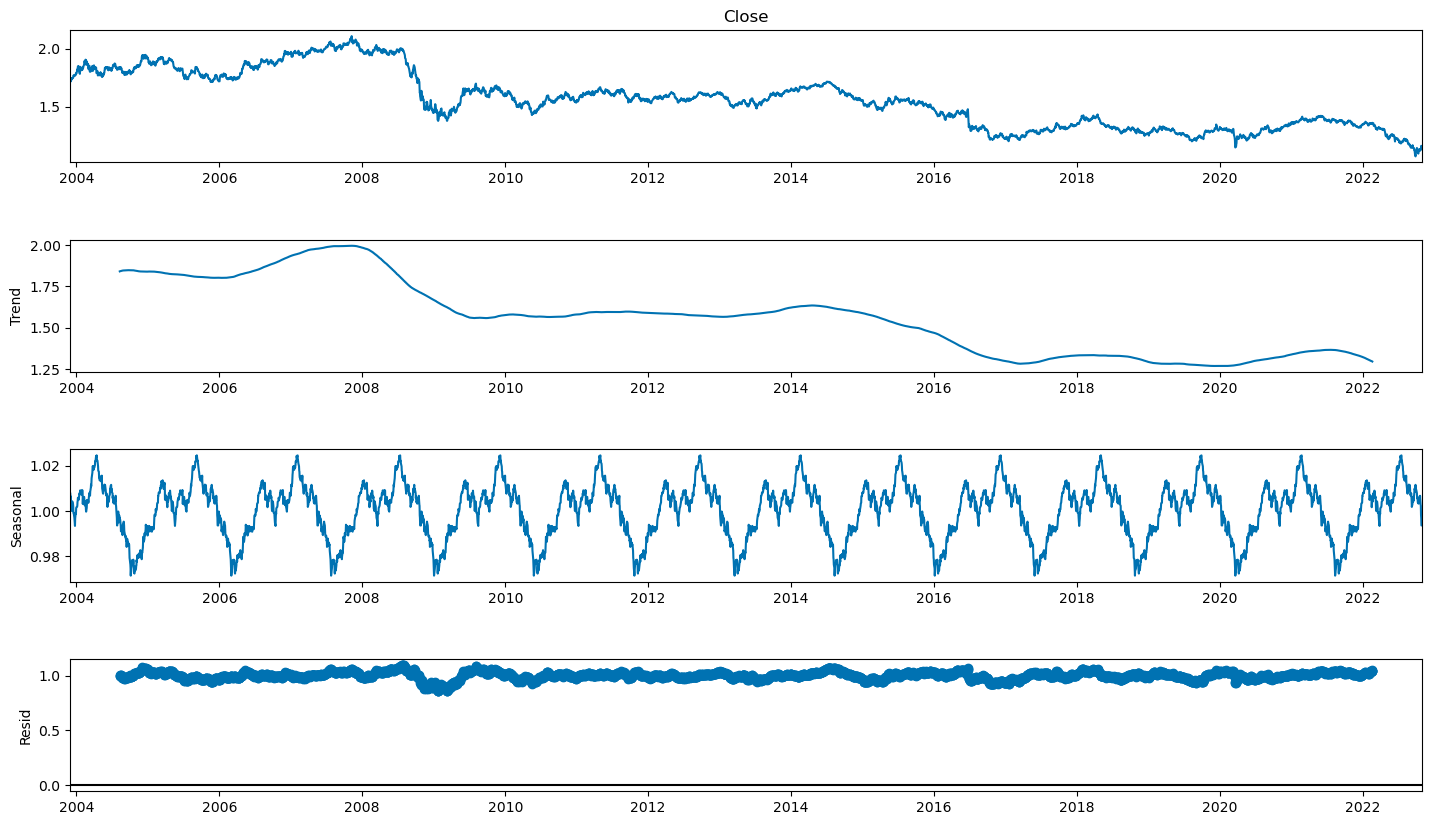

In [13]:
#To separate the trend and the seasonality from a time series, we can decompose the series
result = seasonal_decompose(gbpusd['Close'], model='multiplicative', period = 365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


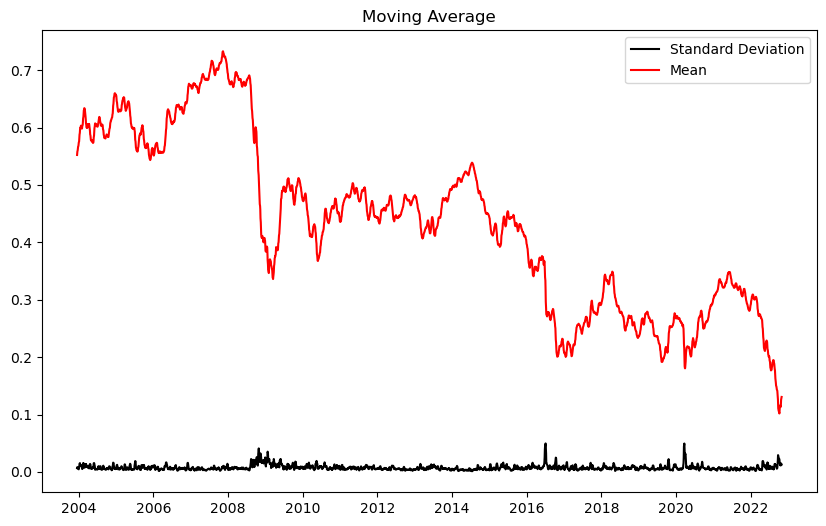

In [14]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(gbpusd['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

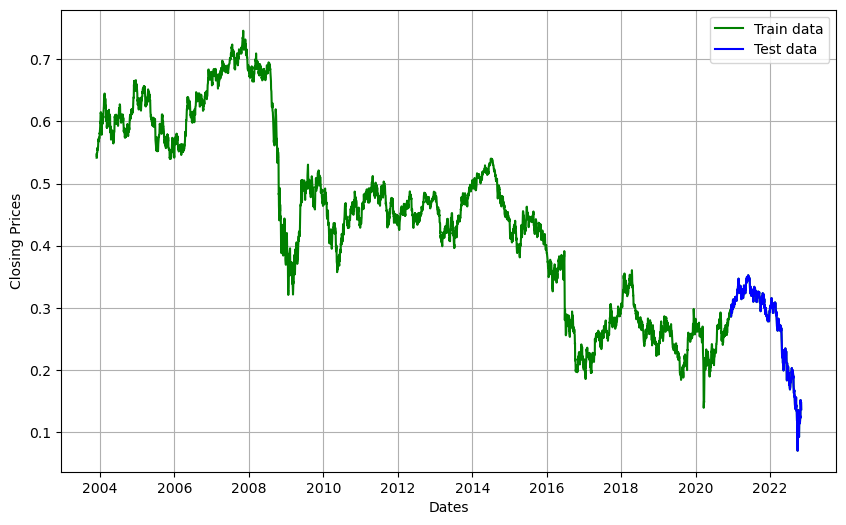

In [15]:
# Train - test splilt on the data
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
# Auto ARIMA: Automatically discover the optimal order for an ARIMA model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-32668.462, Time=1.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-32668.997, Time=2.62 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-32668.945, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-32670.050, Time=1.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-32667.188, Time=4.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 11.241 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4425
Model:               SARIMAX(0, 1, 0)   Log Likelihood               16336.025
Date:                Wed, 02 Nov 2022   AIC                         -32670.050
Time:                        19:59:54   BIC                         -32663.656
Sample:                             0   HQIC                        -32667.795
                               - 4425                            

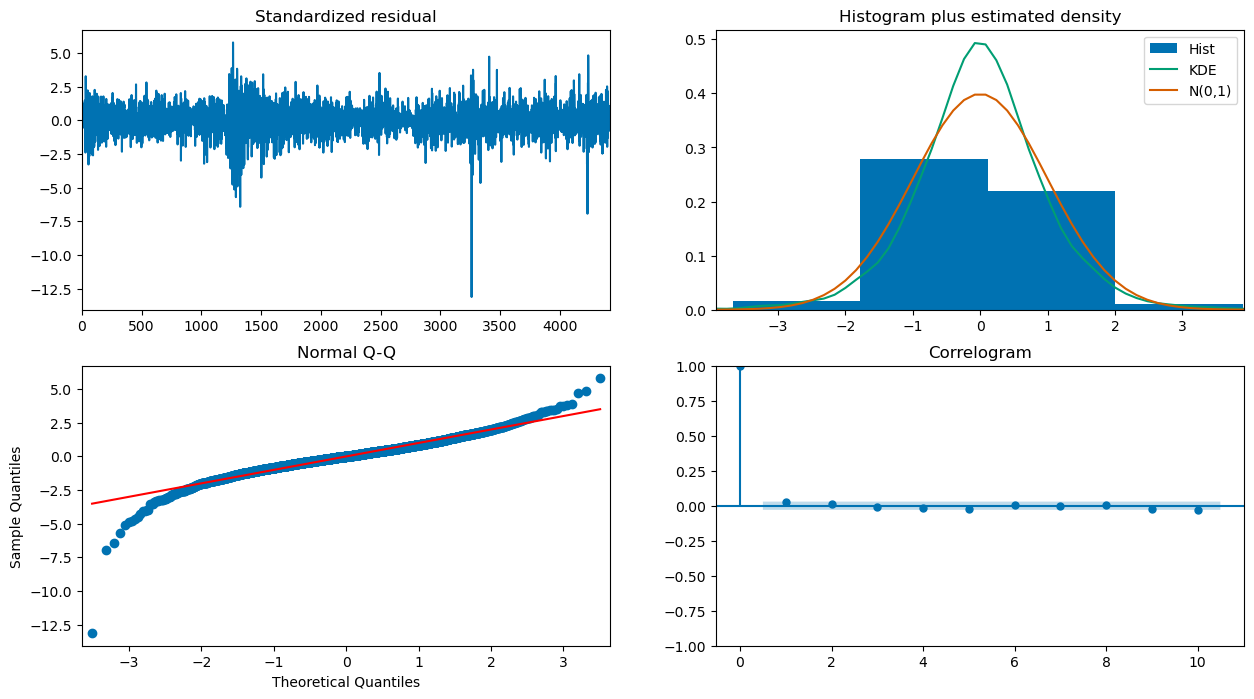

In [16]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # no Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [17]:
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit() #(disp=-1)  disp is optional boolean
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4425
Model:                 ARIMA(0, 1, 0)   Log Likelihood               16336.025
Date:                Wed, 02 Nov 2022   AIC                         -32670.050
Time:                        20:00:22   BIC                         -32663.656
Sample:                             0   HQIC                        -32667.795
                               - 4425                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.631e-05   3.23e-07    112.475      0.000    3.57e-05    3.69e-05
Ljung-Box (L1) (Q):                   2.54   Jarque-Bera (JB):             16720.42
Prob(Q):                              0.11   Pr

In [18]:
# Forecast
fc = fitted.forecast(492, alpha=0.05)  # 95% conf

In [20]:
fc

4425    0.285604
4426    0.285604
4427    0.285604
4428    0.285604
4429    0.285604
          ...   
4912    0.285604
4913    0.285604
4914    0.285604
4915    0.285604
4916    0.285604
Name: predicted_mean, Length: 492, dtype: float64

In [22]:
# report performance
import math

mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))

mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE: 0.0046368384783713815
MAE: 0.05154775719934695
RMSE: 0.06809433514156212


ARIMA Model Evaluation: 
    MSE value: 0.0046368384783713815    The lower the value the better and 0 would mean the model is perfect. 
                                        Since there is no correct answer, the MSE's basic value is in selecting 
                                        one prediction model over another.
                                        
                                        
    MAE value : 0.05154775719934695     The absolute error is the absolute value of the difference between the                                         forecasted value and the actual value. MAE tells us how big of an error                                         we can expect from the forecast on average.
                                        
    RMSE value: 0.06809433514156212     It is a measure of how spread out these residuals are. It tells us how                                         concentrated the data is around the line of best fit. Since the errors                                         are squared before they are averaged, the RMSE gives a relatively high                                         weight to large errors. 
    
    
 
Overall the ARIMA model gives a fairly acceptable value on the exchange rate prediction but considering that the model is aimed to work on the financial field and the investors should invest high amount of money to gain noticable profit, in its current form the ARIMA model could not be used yet to based investment on it. 
In this current project I also built LSMT time series model which gave better prediction values compared to this ARIMA model. 